In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

# Diffusion

Here we setup an $n=50$ site system with open boundaries. We then run for 1000 alternating layers and plot the occupancy probability distribution $\mathbb{P}_i$ with darker shading indicating later time steps. Red is the very last state.

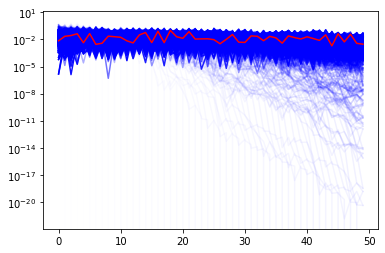

In [2]:
# Make an initial state
n = 50
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))

k = 1000
for i in range(k):
    pyplot.plot(abs(s.get_state())**2,c='b',alpha=(i+1)/k)
    s.apply_layer(i%2 == 1, periodic_boundaries=False)
pyplot.plot(abs(s.get_state())**2,c='r')

pyplot.yscale('log')
pyplot.show()

Lets check that everything is unitary, sum the total error of $\langle \psi \vert \psi \rangle^2 - 1$

In [3]:
%%time

s = py_entropy.ThreadedSingleDefectStates(10000, numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))
s.apply_alternative_layers(k, periodic_boundaries=False)

print("Total unitarity error: {}".format(sum(abs((abs(s.get_state())**2).sum(axis=1) - 1))))

Total unitarity error: 1.3168910406591294e-11
CPU times: user 1min 21s, sys: 1.63 s, total: 1min 23s
Wall time: 3.52 s


Now we look at the state purity over time:
$$F_k = \sum_s \vert \langle s \vert \psi_k \rangle \vert^4 - 2\sum_{s'>s} \vert \langle s' \vert \psi_k \rangle \vert^2 \vert \langle s \vert \psi_k \rangle \vert^2$$

With $k$ the layer depth, we plot this over $k$ for a single run.

1.0


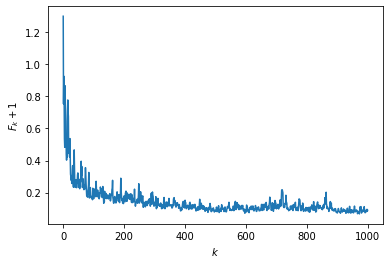

In [4]:
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))
print(s.get_purity())
purities = s.apply_alternative_layers_and_save_purity(k, periodic_boundaries=False)

pyplot.plot(purities + 1)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k + 1$')
pyplot.show()

Now lets average the purity over $10,000$ samples with $n=50$ and $k=1000$

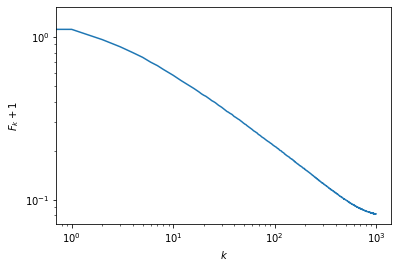

CPU times: user 10min 55s, sys: 1.13 s, total: 10min 56s
Wall time: 27.7 s


In [5]:
%%time

s = py_entropy.ThreadedSingleDefectStates(10000, numpy.asarray([1.0] + [0]*49, dtype="complex128"))
purities = s.apply_alternative_layers_and_save_purity(k, periodic_boundaries=False)

pyplot.plot(purities.mean(0)+1)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k + 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.show()